In [1]:
import os
import glob
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib 
import seaborn as sns
from PIL import Image

In [2]:
stream = open('../config/config.yml', 'r')
config = yaml.load(stream, yaml.Loader)

In [3]:
PATH = '../' + config['datasets']['root']
PATH

'../../../Datasets/Classification/Data_classification/'

In [4]:
folders = glob.glob(os.path.join(PATH, '*/'))

In [5]:
data = {
    'file': [],
    'label': []
}
for folder in folders:
    files = [os.path.basename(file) for file in glob.glob(folder + '/*')]
    for file in files:
        data['file'].append(file)
        data['label'].append(pathlib.PurePath(folder).name)

In [6]:
df = pd.DataFrame(data)
print(df)

                                           file label
0      4502b923-2111-456f-ad5b-3969a146dc37.png   SCC
1      b96887ce-71b0-486b-8ddc-79043ed95c6c.png   SCC
2      db4ca14a-5010-492b-b652-27b6de3b57e9.png   SCC
3      5ad7075b-f720-408d-8d8e-19deb48b4740.png   SCC
4      25c70568-59ac-47ca-8182-6835b65988f5.png   SCC
...                                         ...   ...
18747  50791b36-e1d9-43e5-94e9-ba27345e28a9.png  HSIL
18748  ad0980b2-a4ef-4084-9c2b-8542889f6abf.png  HSIL
18749  20c9e364-0719-42ae-b5c5-e3c7f71b1e3c.png  HSIL
18750  5f90643f-2e5e-433b-a13c-68c52b99d898.png  HSIL
18751  30db3ab5-466b-4634-8917-0042c99b6693.png  HSIL

[18752 rows x 2 columns]


<Axes: xlabel='label', ylabel='count'>

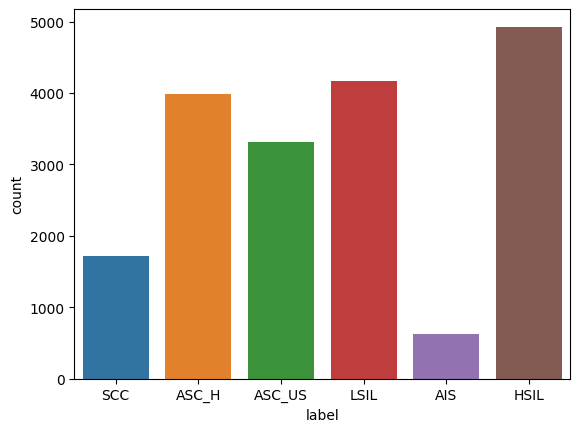

In [7]:
sns.countplot(df, x=df['label'])

In [8]:
df_sample = df.sample(frac=1).reset_index(drop=True)

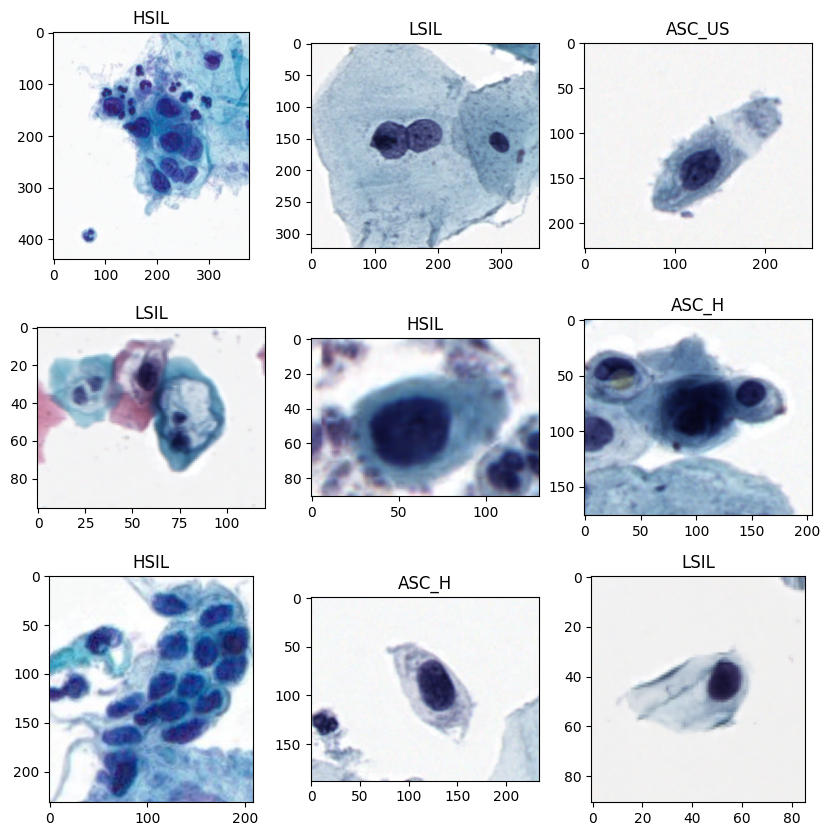

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    title = df_sample['label'][i]
    img = Image.open(f"{PATH}/{title}/{df_sample['file'][i]}")
    plt.imshow(img)
    plt.title(title)

plt.show()

In [10]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

In [24]:
transform = transforms.Compose([
    transforms.Resize([512, 512]),
    transforms.ToTensor()
])

In [25]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, transform=None):
        self.df = df.to_numpy()
        self.transform = transform
        self.convert_labels()

    def convert_labels(self):
        labels = set(df['label'])
        self.class2index = {label: idx for idx, label in enumerate(labels)}
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        filename = self.df[index][0]
        folder = self.df[index][1]
        label = self.class2index[folder]
        file_path = f"{PATH}{folder}/{filename}"
        image = Image.open(file_path)
        if self.transform is not None:
            image = self.transform(image)

        return image, label


In [26]:
data_ = CustomDataset(df_sample, transform)

In [27]:
loader = torch.utils.data.DataLoader(data_, batch_size=64, shuffle=True)

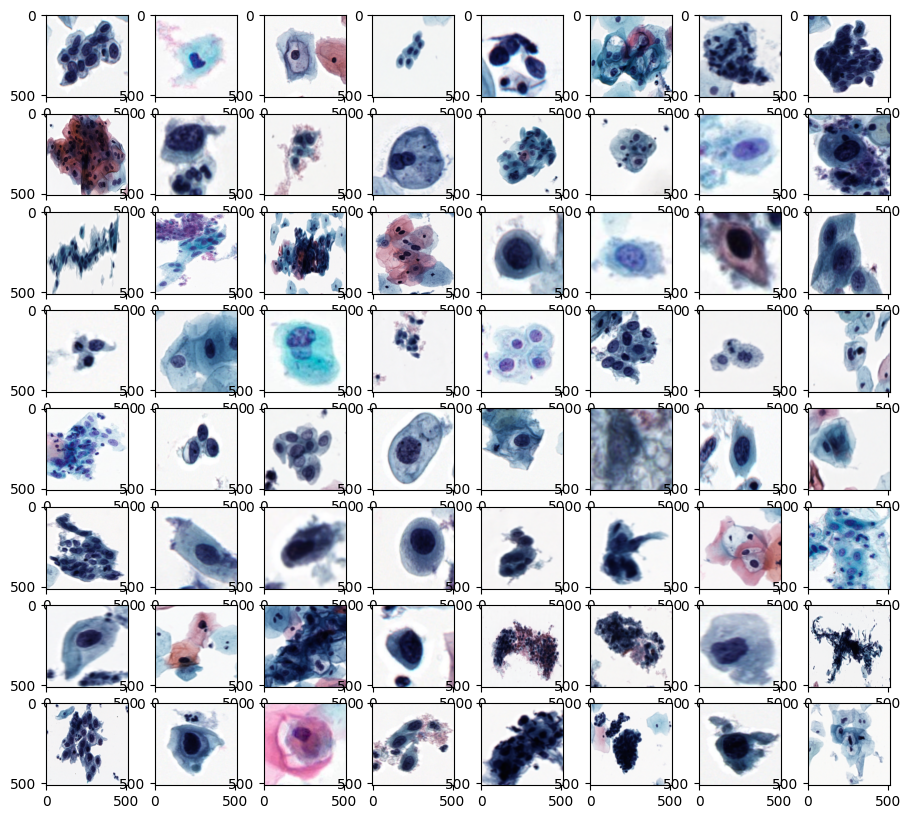

In [28]:
batch = next(iter(loader))
imgs, label = batch
plt.figure(figsize=(11, 10))
for i in range(64):
    plt.subplot(8, 8, i+1)
    image = imgs[i].numpy().transpose(1, 2, 0)
    plt.imshow(image)
plt.show()